In [2]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Text(0, 0.5, 'magnitude')

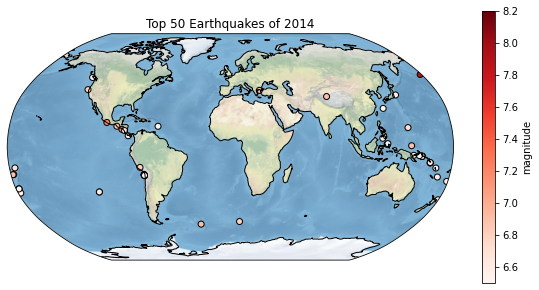

In [59]:
#task 1
# Load the csv file
ds = pd.read_csv("usgs_earthquakes.csv")
# Check the data
ds

magnitude = ds.sort_values('mag',ascending=0).head(50)
magnitude

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()
plt.title("Top 50 Earthquakes of 2014")

plt.scatter('longitude', 'latitude', data=magnitude,c='mag', cmap='Reds',edgecolors='black',transform=ccrs.PlateCarree())
cbar=plt.colorbar()
cbar.ax.set_ylabel('magnitude')

C:\Users\wy\anaconda3\envs\ese5023\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\wy\anaconda3\envs\ese5023\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\wy\anaconda3\envs\ese5023\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\wy\anaconda3\envs\ese5023\lib\si

Text(-150, 0, 'Niño 3.4 region')

C:\Users\wy\anaconda3\envs\ese5023\lib\site-packages\cartopy\mpl\gridliner.py:842: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
C:\Users\wy\anaconda3\envs\ese5023\lib\site-packages\cartopy\mpl\gridliner.py:848: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
C:\Users\wy\anaconda3\envs\ese5023\lib\site-packages\numpy\lib\function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will n

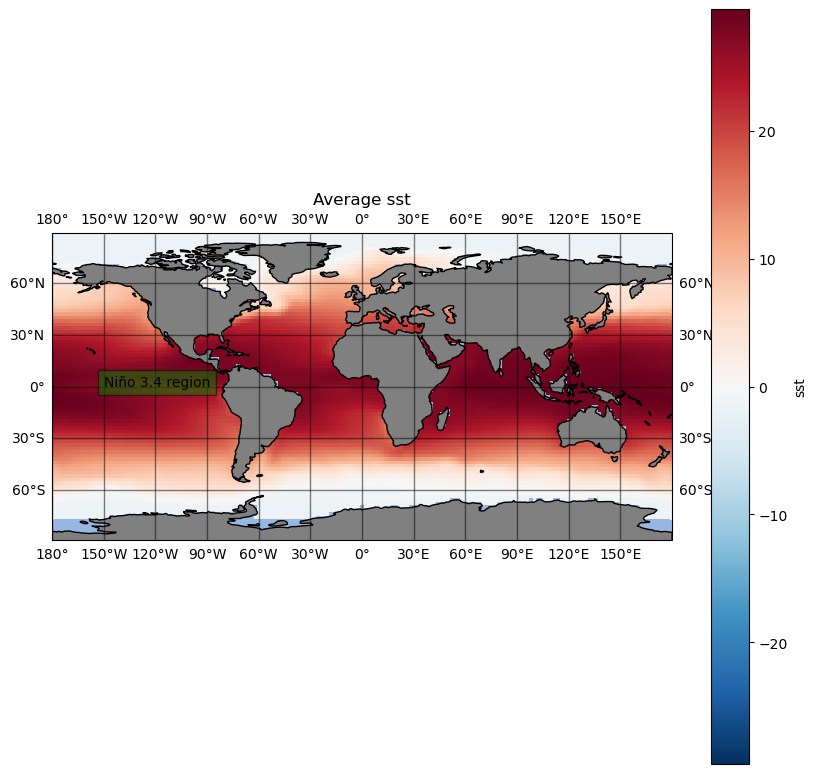

In [86]:
#task 2.1
ds2 = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1)

# Draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
sst_mean=ds2.sst.mean(dim='time')
sst_mean.plot(ax=ax, transform=ccrs.PlateCarree())
plt.title("Average sst")

#annotations and text box
bbox = {"facecolor": "green", "alpha": 0.5}
styles = {"size": 10, "color": "black", "bbox": bbox}
text = "Niño 3.4 region"
ax.text(-150, 0, text, **styles)

Text(-150, 0, 'Niño 3.4 region')

C:\Users\wy\anaconda3\envs\ese5023\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\wy\anaconda3\envs\ese5023\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\wy\anaconda3\envs\ese5023\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


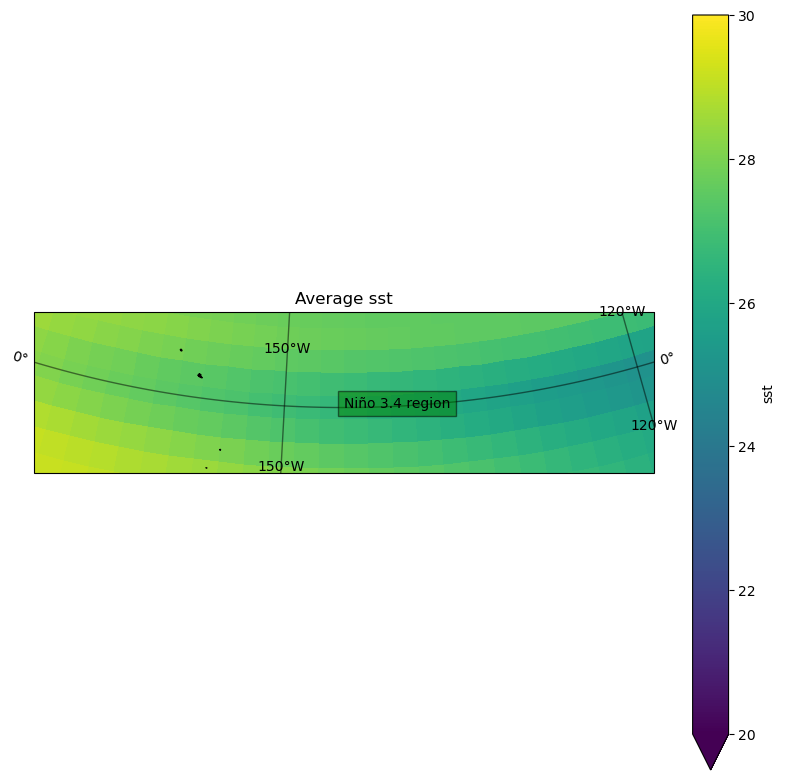

In [93]:
#task 2.2
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=100)

# Create an axes with an basic PlateCarree projection style
central_lon, central_lat = -145, 0 
proj = ccrs.LambertConformal(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-25, central_lon+25, central_lat-5, central_lat+5]
ax.set_extent(extent)

# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1)

# Draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
sst_mean=ds2.sst.mean(dim='time')
sst_mean.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=20, vmax=30)
plt.title("Average sst")

#annotations and text box
bbox = {"facecolor": "green", "alpha": 0.5}
styles = {"size": 10, "color": "black", "bbox": bbox}
text = "Niño 3.4 region"
ax.text(-150, 0, text, **styles)